# Exploratory Data Analysis & Seaborn

In [1]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Подготовка данных 

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

f_path = os.path.join('data', 'Snacks_Data.csv')
snacks_sales = pd.read_csv(f_path)
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)

snacks_sales.shape
snacks_sales.head(20)

(1095, 12)

,Period,daywk,weekend,Date,Cakes,Pies,Cookies,Smoothies,Coffee,Promotion,Month,Quarter
0,1,Tuesday,N,1/1/2015,79,46,518,60,233,No,1,1
1,2,Wednesday,N,1/2/2015,91,50,539,161,427,No,1,1
2,3,Thursday,N,1/3/2015,47,60,222,166,347,No,1,1
3,4,Friday,N,1/4/2015,89,64,734,153,358,No,1,1
4,5,Saturday,Y,1/5/2015,112,73,764,240,392,No,1,1
5,6,Sunday,Y,1/6/2015,89,57,922,259,510,No,1,1
6,7,Monday,N,1/7/2015,70,50,476,120,334,No,1,1
7,8,Tuesday,N,1/8/2015,70,48,496,222,316,No,1,1
8,9,Wednesday,N,1/9/2015,59,37,587,181,156,No,1,1
9,10,Thursday,N,1/10/2015,71,36,488,178,298,No,1,1


## Relational Plots, sns.relplot()
- lineplot(), kind='line'
- scatterplot(), kind='scatter' default option

### lineplot()

#### Линейная диаграмма  один к одному для сравниваемых показателей

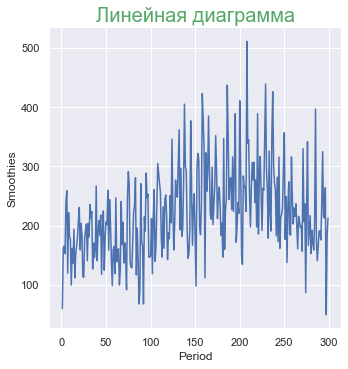

In [4]:
sns.set(style='darkgrid')  

sns.relplot(
    x='Period', 
    y='Smoothies', 
    data=snacks_sales.query("Period < 300"), 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

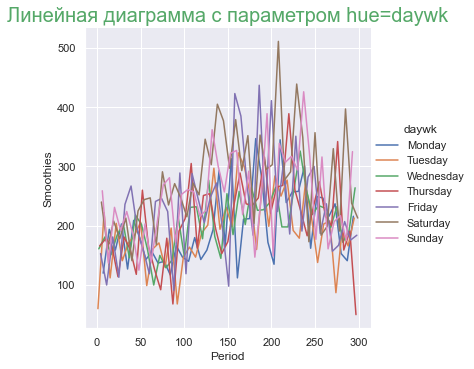

In [5]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(
    x='Period', 
    y='Smoothies', 
    hue='daywk', 
    hue_order=day_order,
    data=snacks_sales.query("Period < 300"), kind='line')
plt.title('Линейная диаграмма с параметром hue=daywk', size=20, color='g');

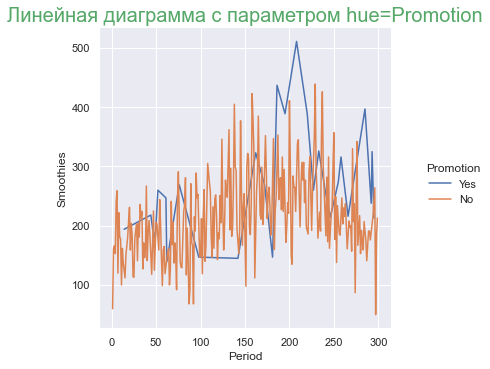

In [6]:
sns.relplot(x='Period',
            y='Smoothies',
            hue='Promotion',
            hue_order=["Yes", "No"],
            data=snacks_sales.query("Period < 300"), kind='line')
plt.title('Линейная диаграмма c параметром hue=Promotion', size=20, color='g');

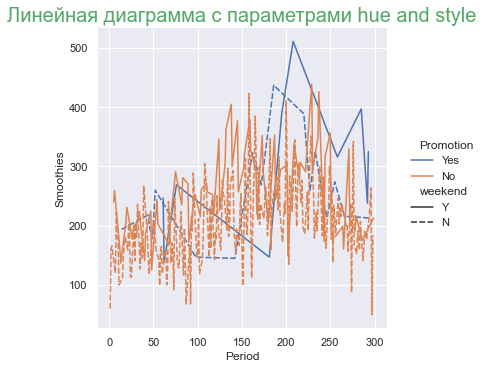

In [7]:
sns.relplot(
    x='Period', 
    y='Smoothies',
    hue='Promotion', 
    hue_order=["Yes", "No"], 
    style='weekend', 
    style_order=["Y", "N"], 
    kind='line', 
    data=snacks_sales.query("Period < 300"))
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

plt.show();


#### Линейные диаграммы с отношением один ко многим

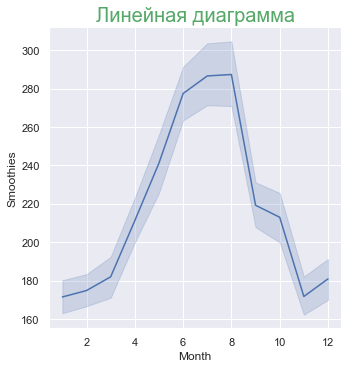

In [8]:
sns.relplot(
    x='Month', 
    y='Smoothies', 
    data=snacks_sales, 
    kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

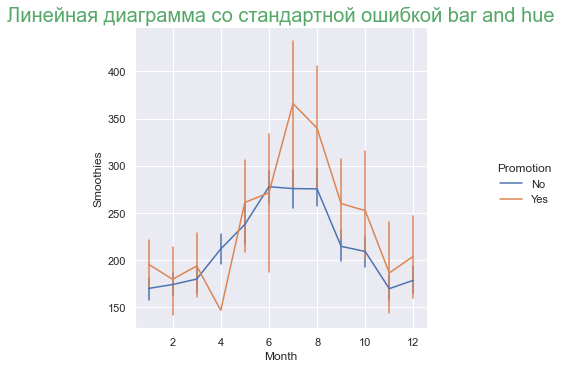

In [9]:
sns.relplot(
    x='Month', 
    y='Smoothies', 
    hue='Promotion', 
    data=snacks_sales, 
    kind='line',
    err_style="bars", 
    ci=99)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');


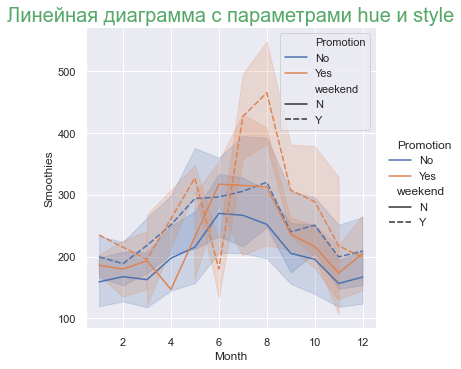

In [10]:
sns.relplot(
    x='Month',
    y='Smoothies',
    hue='Promotion',
    style='weekend', 
    kind='line', 
    ci='sd', 
    data=snacks_sales)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');
plt.legend();

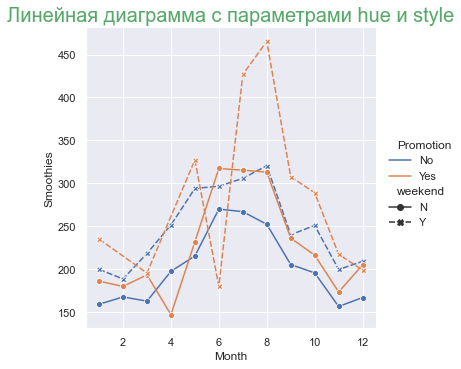

In [11]:
sns.relplot(
    x='Month',
    y='Smoothies', 
    hue='Promotion', 
    style='weekend', 
    dashes=True, 
    markers=True,
    data=snacks_sales, 
    kind='line', 
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

### Создание длинного датафрейма из датафрейма широкой формы

* В широкой форме для каждого продукта есть отдельная колонка
* В длинной форме все продукты схлопываются в одну, за счет этого таблица становится менее широкй и более длинной

In [12]:
snacks_sales

,Period,daywk,weekend,Date,Cakes,Pies,Cookies,Smoothies,Coffee,Promotion,Month,Quarter
0,1,Tuesday,N,1/1/2015,79,46,518,60,233,No,1,1
1,2,Wednesday,N,1/2/2015,91,50,539,161,427,No,1,1
2,3,Thursday,N,1/3/2015,47,60,222,166,347,No,1,1
3,4,Friday,N,1/4/2015,89,64,734,153,358,No,1,1
4,5,Saturday,Y,1/5/2015,112,73,764,240,392,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1091,Sunday,Y,12/27/2017,136,49,700,265,483,No,12,4
1091,1092,Monday,N,12/28/2017,77,45,605,69,408,No,12,4
1092,1093,Tuesday,N,12/29/2017,93,56,508,185,452,No,12,4
1093,1094,Wednesday,N,12/30/2017,62,28,458,141,356,No,12,4


In [13]:
long_sales = pd.melt(snacks_sales, var_name='Item', value_name='Sales',
            id_vars=['daywk', 'weekend', 'Date', 'Promotion', 'Period', 'Month', 'Quarter'])
long_sales.shape         
long_sales.sample(n=5)   



(5475, 9)

,daywk,weekend,Date,Promotion,Period,Month,Quarter,Item,Sales
5174,Friday,N,3/6/2017,No,795,3,1,Coffee,492
4180,Monday,N,6/15/2017,No,896,6,2,Smoothies,276
1468,Thursday,N,1/9/2016,Yes,374,1,1,Pies,56
246,Wednesday,N,9/4/2015,No,247,9,3,Cakes,65
4973,Sunday,Y,8/17/2016,No,594,8,3,Coffee,450


#### Линейные диаграммы из датафрейма длинной формы

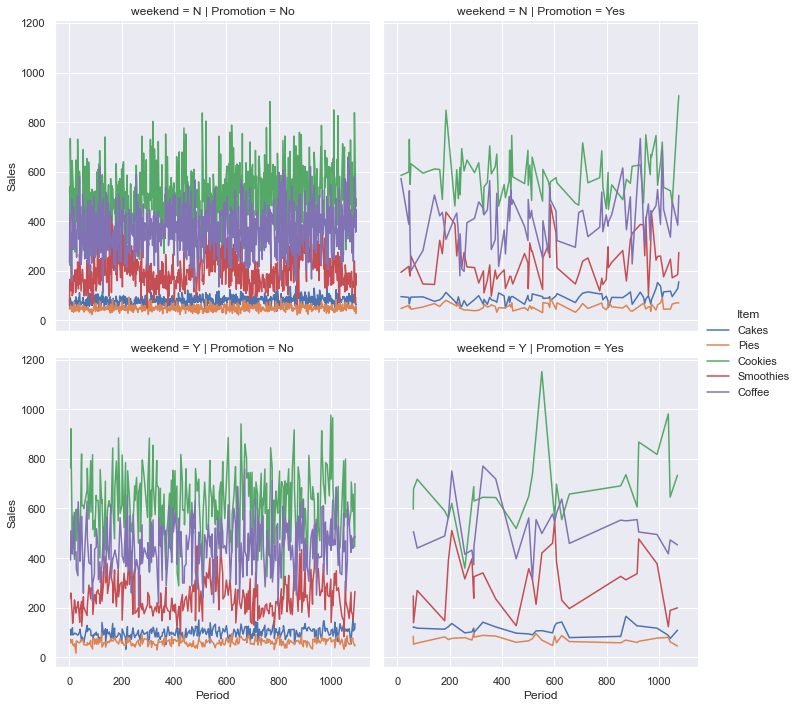

In [14]:
g = sns.relplot(
    x='Period', 
    y='Sales', 
    data=long_sales, 
    kind='line', 
    hue='Item', 
    row='weekend', 
    col='Promotion')

### Scatterplot()

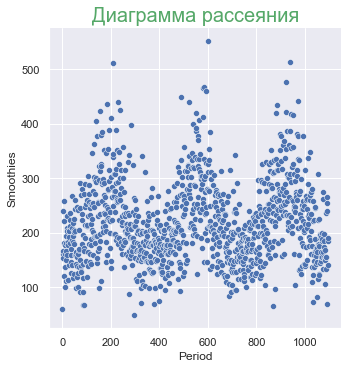

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(
    x='Period',
    y='Smoothies',
    data=snacks_sales,
#     kind='scatter'
#     kind='line'
)
plt.title('Диаграмма рассеяния', size=20, color='g');

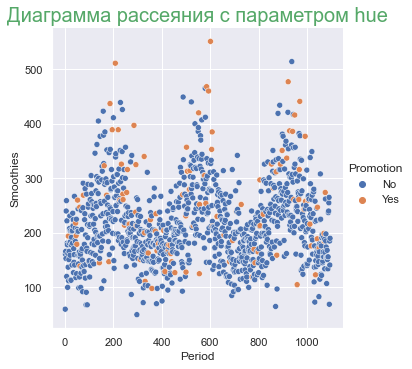

In [16]:
sns.relplot(
    x='Period', 
    y='Smoothies', 
    hue='Promotion', 
    data=snacks_sales)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

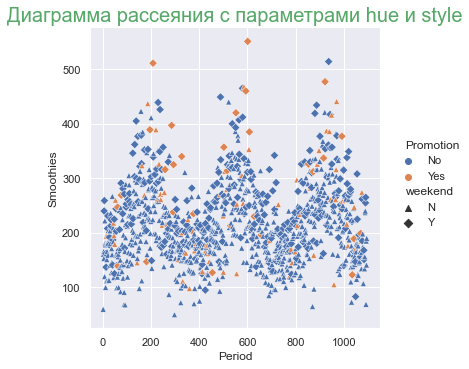

In [17]:
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    style='weekend', 
    markers=['^', 'D'],
    data=snacks_sales)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

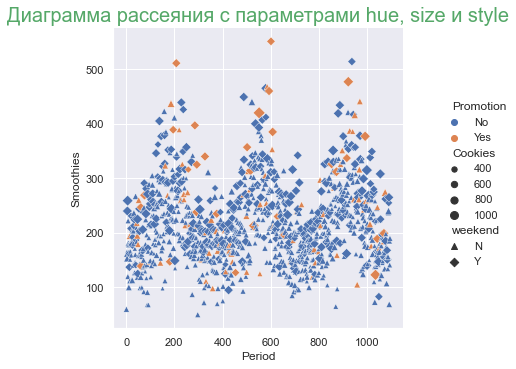

In [18]:
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    style='weekend',
    size='Cookies',
    markers=['^', 'D'],
    data=snacks_sales
)

plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

#### Диаграмма рассеяния с параметром Hue и дополнительными переменными

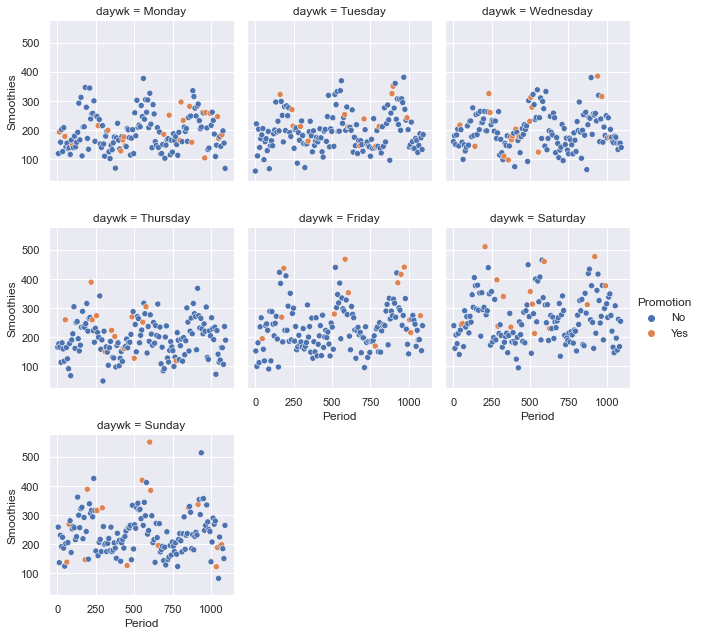

In [19]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    col='daywk',
    col_wrap=3,
    col_order=day_order,
    data=snacks_sales,
    height=3
);

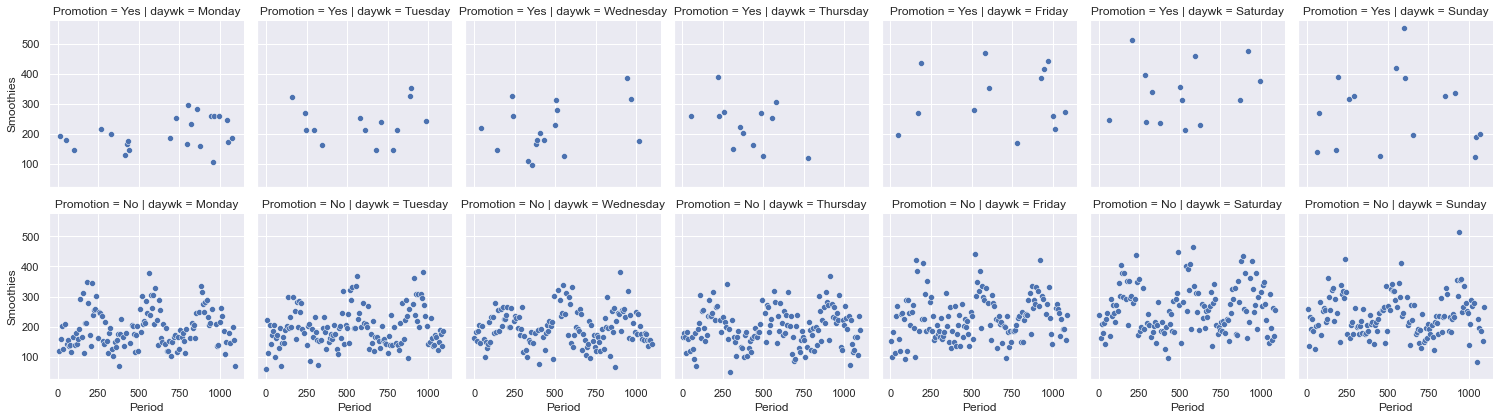

In [21]:
sns.relplot(
    x='Period',
    y='Smoothies',
    col='daywk',
    col_order=day_order,
    row='Promotion',
    row_order=['Yes', 'No'],
    data=snacks_sales,
    height=3);


## Категорийные диаграммы, sns.catplot()
- stripplot() and swarmplot()
- boxplot() and boxnplot()
- barplot() and countplot()
- violinplot()
- pointplot()


* stripplot(), kind='strip' 
* swarmplot(), kind='swarm'

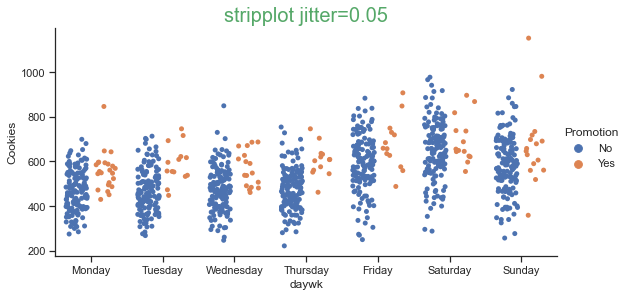

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='daywk',
    y='Cookies', 
    data=snacks_sales, 
    hue='Promotion',    # оба на одном графике разными цветами
    order=day_order, 
    jitter=0.3,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

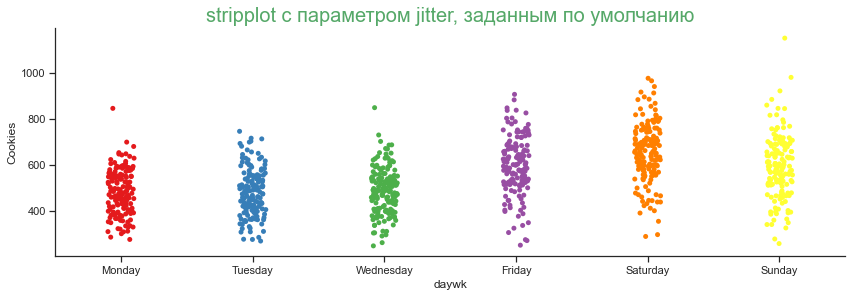

In [23]:
sns.catplot(
    x='daywk',
    y='Cookies', 
    data=snacks_sales.query("daywk != 'Thursday'"), 
    order=['Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday', 'Sunday'],
    palette='Set1', 
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=3); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn

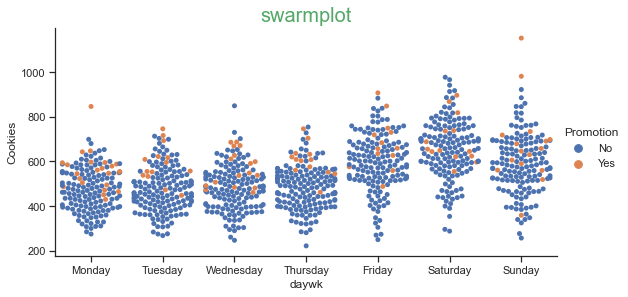

In [24]:
sns.catplot(
    x='daywk',
    y='Cookies', 
    data=snacks_sales, 
    order=day_order, 
    hue='Promotion',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

### boxplot(), kind='box'
### boxnplot(), kind='boxn'

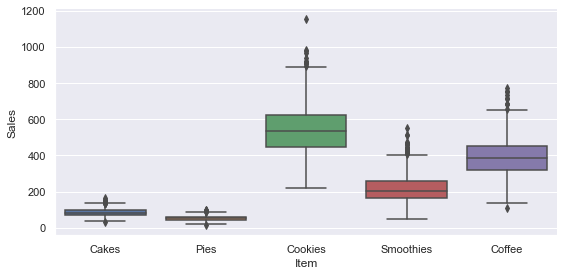

In [25]:
sns.set(style='darkgrid')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    height=4, 
    aspect=2
); 

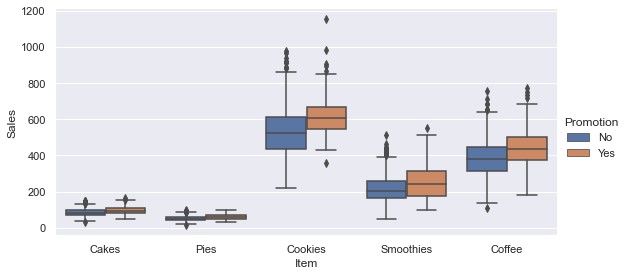

In [26]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='Promotion',
    height=4, 
    aspect=2); 

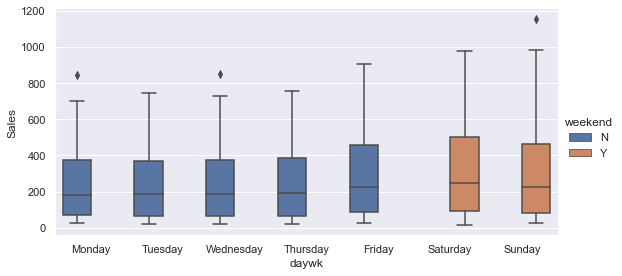

In [27]:
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='weekend', 
    order=day_order, 
    height=4, 
    aspect=2); 

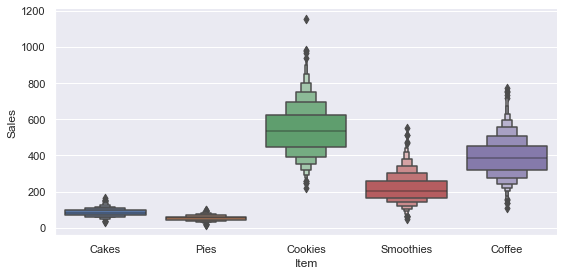

In [28]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='boxen', 
    height=4, 
    aspect=2); 

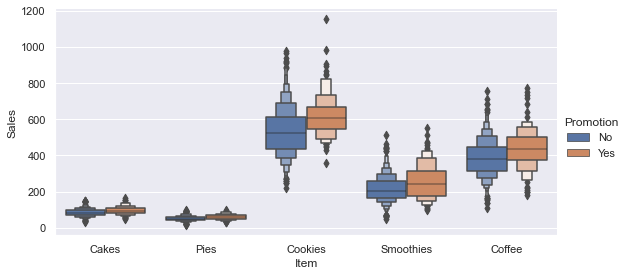

In [29]:
sns.catplot(
    x='Item',
    y='Sales',
    data=long_sales,
    kind='boxen',
    hue='Promotion',
    height=4, 
    aspect=2);

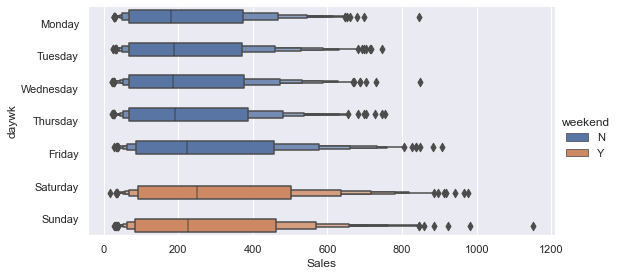

In [30]:
sns.catplot(
    x='Sales', 
    y='daywk', 
    data=long_sales, 
    kind='boxen', 
    hue='weekend',
    order=day_order, 
    height=4, 
    aspect=2); 

### barplot(), kind='bar'
### countplot(), kind='count'

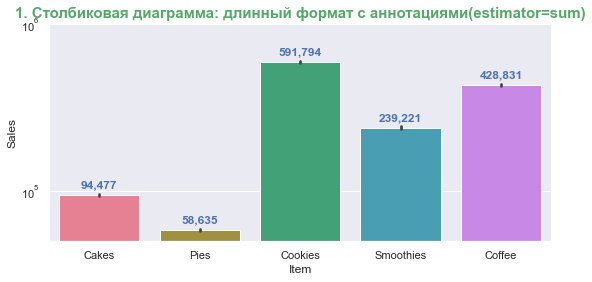

In [31]:
# possible options for estimator: numpy: median, sum, python: sum, len(for count) includes NaN
# pandas: pandas.Series.count, pandas.Series.sum ignore NaN
# in this data set mean and median are very close, and count is same for all the items so 
# these options don't reveal any thing significant 

from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log', ylim=[50000, 1000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

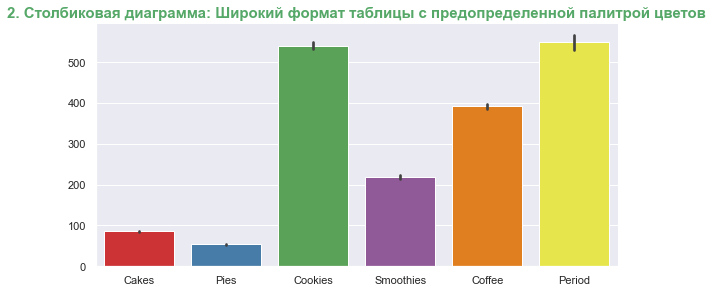

In [32]:
sns.catplot(
    data=snacks_sales, 
    kind='bar', 
    height=4, 
    aspect=2,   
    order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period'],
    palette="Set1"
); 
plt.title('2. Столбиковая диаграмма: Широкий формат таблицы с предопределенной палитрой цветов', size=15, color='g', 
          weight='bold');

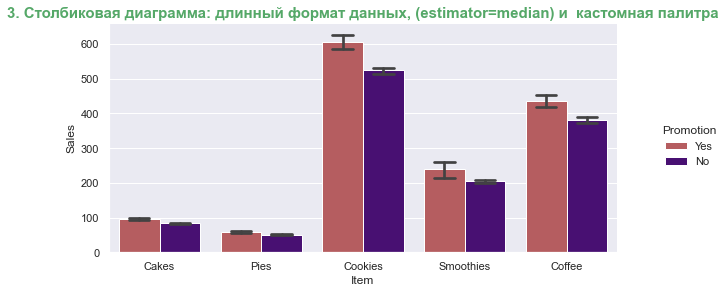

In [33]:

sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='bar', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette={"Yes": "r", "No": "indigo"},
    estimator=median, 
    capsize=0.2, 
    height=4, 
    aspect=2); 

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

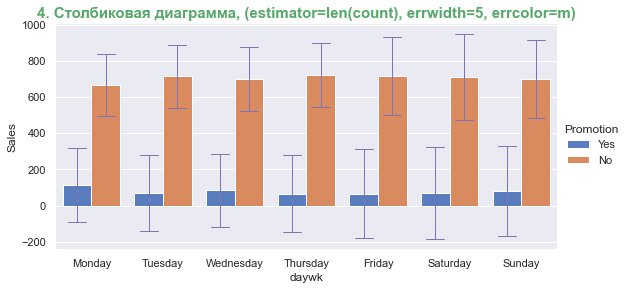

In [34]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='bar', 
    hue='Promotion', 
    ci='sd',
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1,
    hue_order=['Yes','No'], 
    palette="muted", 
    order=day_order, 
    height=4, 
    aspect=2);
plt.title('4. Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)',
          size=15, 
          color='g', 
          weight='bold'
         );

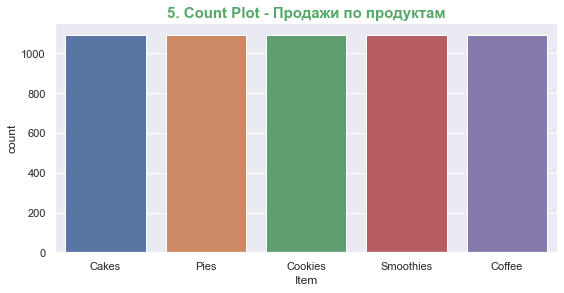

In [35]:
# Count Plot показывает количество наблюдений

sns.catplot(x='Item', 
            data=long_sales, 
            kind='count', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Продажи по продуктам', size=15, color='g', weight='bold');

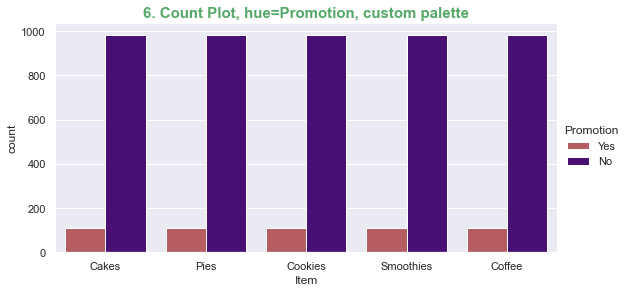

In [36]:
sns.catplot(
    x='Item', 
    data=long_sales, 
    kind='count', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette={"Yes": "r", "No": "indigo"}, 
    height=4, 
    aspect=2); 
plt.title('6. Count Plot, hue=Promotion, custom palette', size=15, color='g', weight='bold');

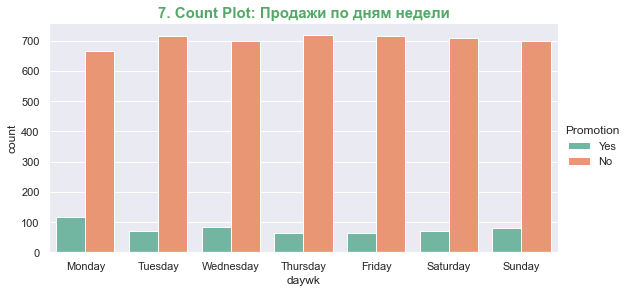

In [37]:
sns.catplot(
    x='daywk', 
    data=long_sales, 
    kind='count', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette="Set2", 
    order=day_order, 
    height=4, 
    aspect=2);
plt.title('7. Count Plot: Продажи по дням недели', size=15, color='g', weight='bold');

### violinplot(), kind='violin'

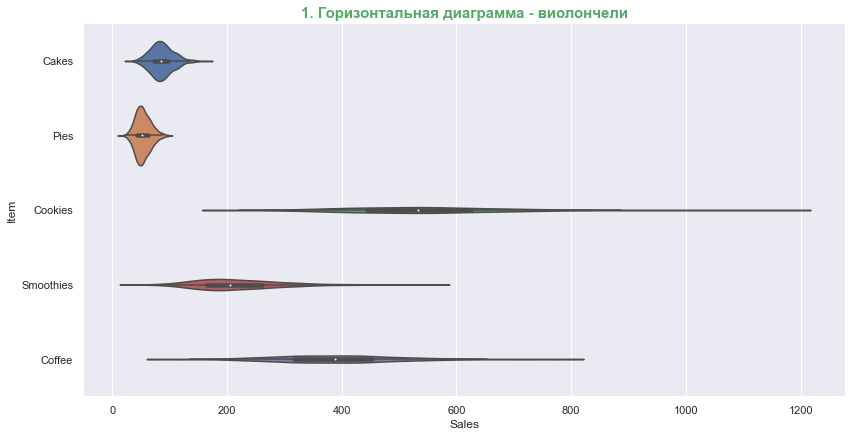

In [38]:
sns.catplot(
    x='Sales',
    y='Item',
    data=long_sales,
    kind='violin',
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

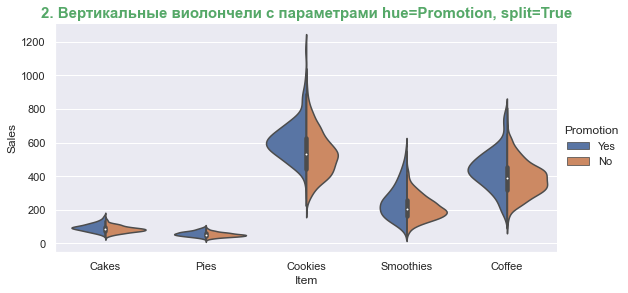

In [39]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='violin', 
    hue='Promotion', 
    hue_order=["Yes", "No"], 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('2. Вертикальные виолончели с параметрами hue=Promotion, split=True', size=15, color='g', weight='bold');

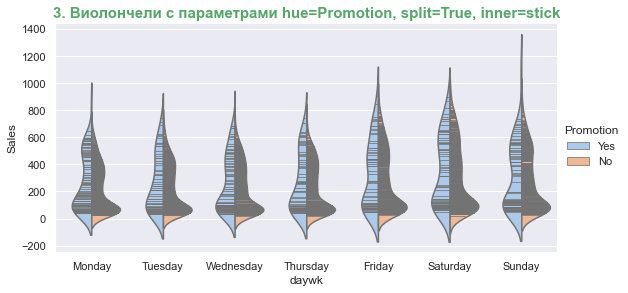

In [40]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='violin', 
    order=day_order, 
    hue='Promotion', 
    hue_order=["Yes", "No"], 
    split=True, 
    inner="stick", 
    palette="pastel",
    height=4, 
    aspect=2)
plt.title('3. Виолончели с параметрами hue=Promotion, split=True, inner=stick', size=15, color='g', weight='bold');

### pointplot(), kind='point'

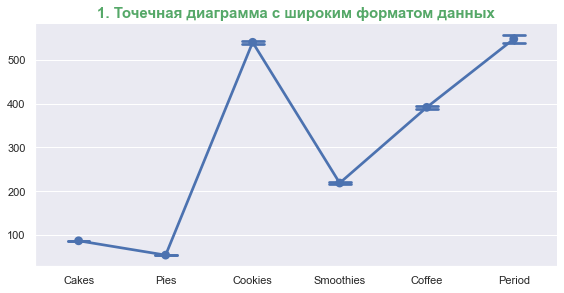

In [41]:
sns.catplot(
    data=snacks_sales, 
    kind='point', 
    ci=68, 
    capsize=0.25, 
    height=4,        # wide form df
    aspect=2, 
    order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period']
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

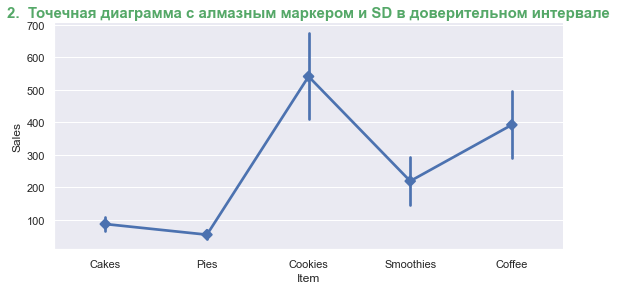

In [42]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, # long form data frame
    kind='point', 
    markers='D', 
    ci='sd',
    height=4, 
    aspect=2)  
plt.title('2.  Точечная диаграмма с алмазным маркером и SD в доверительном интервале', size=15, color='g', weight='bold');

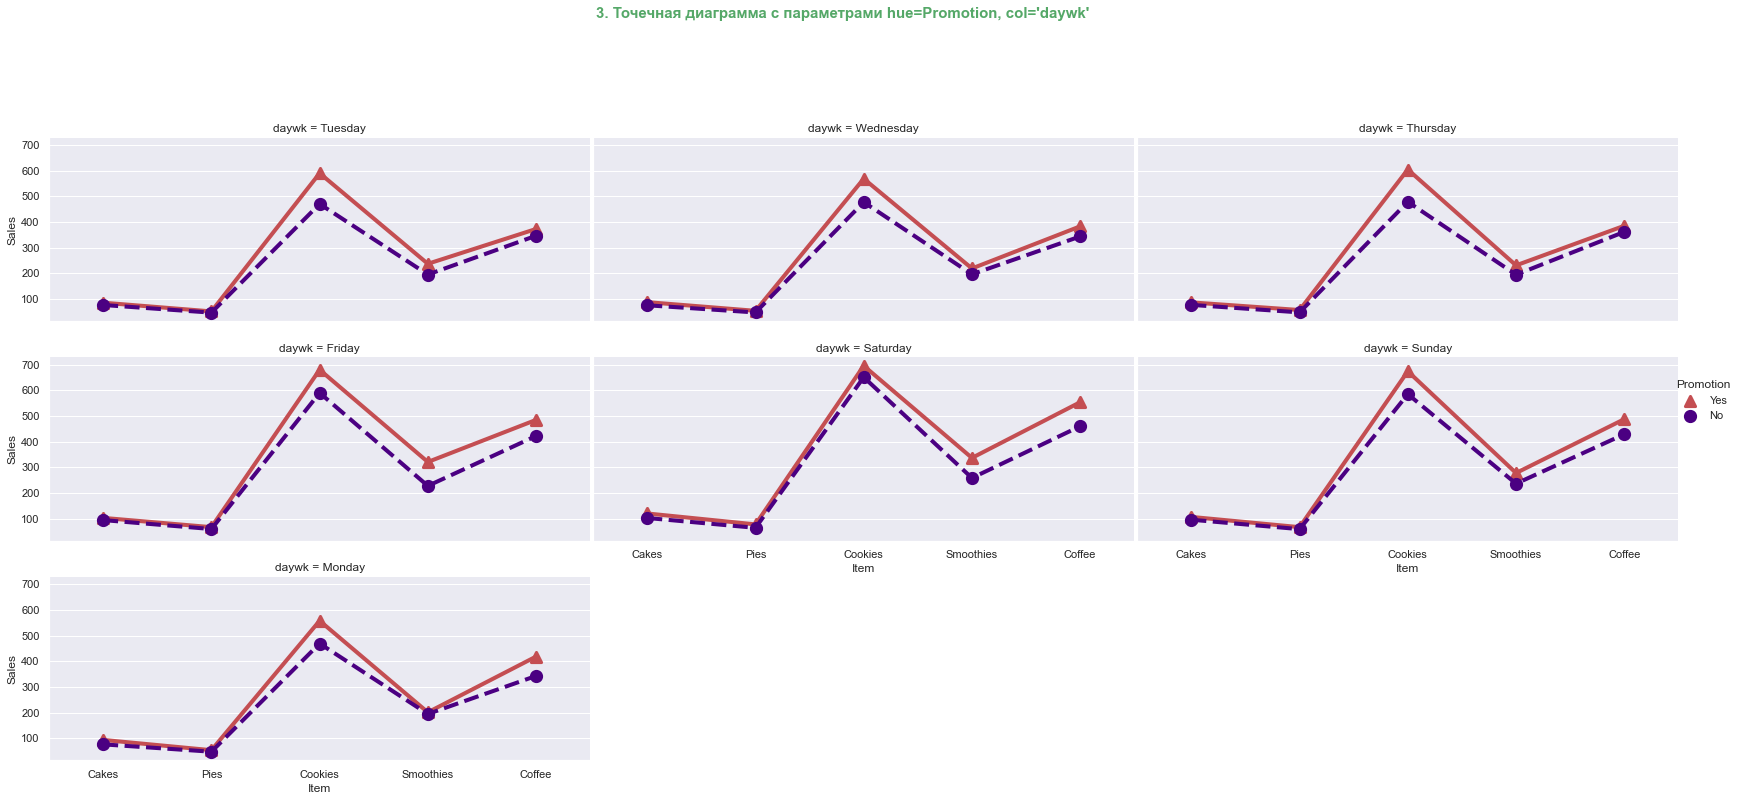

In [43]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='point', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette={"Yes": "r", "No": "indigo"},
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col='daywk', 
    col_wrap=3,
    height=4, 
    aspect=2, 
    scale=1.5)
plt.suptitle("3. Точечная диаграмма с параметрами hue=Promotion, col='daywk'", size=15, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

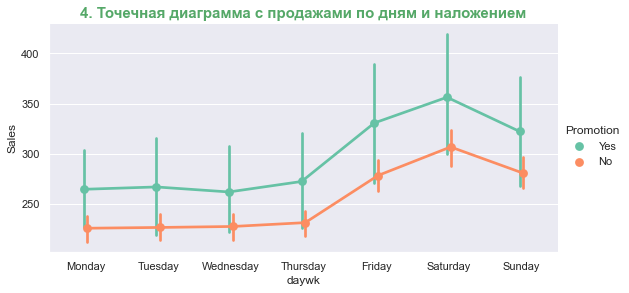

In [44]:
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='point', 
    hue='Promotion',
    dodge=True,
    hue_order=['Yes','No'], 
    palette="Set2", 
    order=day_order, 
    height=4, 
    aspect=2)
plt.title('4. Точечная диаграмма с продажами по дням и наложением', size=15, color='g', weight='bold');

## Диаграммы распределения
- distplot()
- rugplot()
- kdeplot()

### distplot() and rugplot()

/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


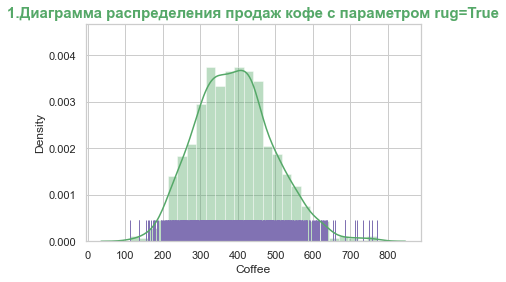

In [45]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    snacks_sales.Coffee,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения продаж кофе с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


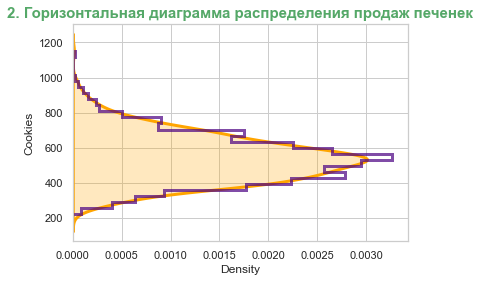

In [46]:
sns.distplot(
    snacks_sales.Cookies,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

### pairplot() 

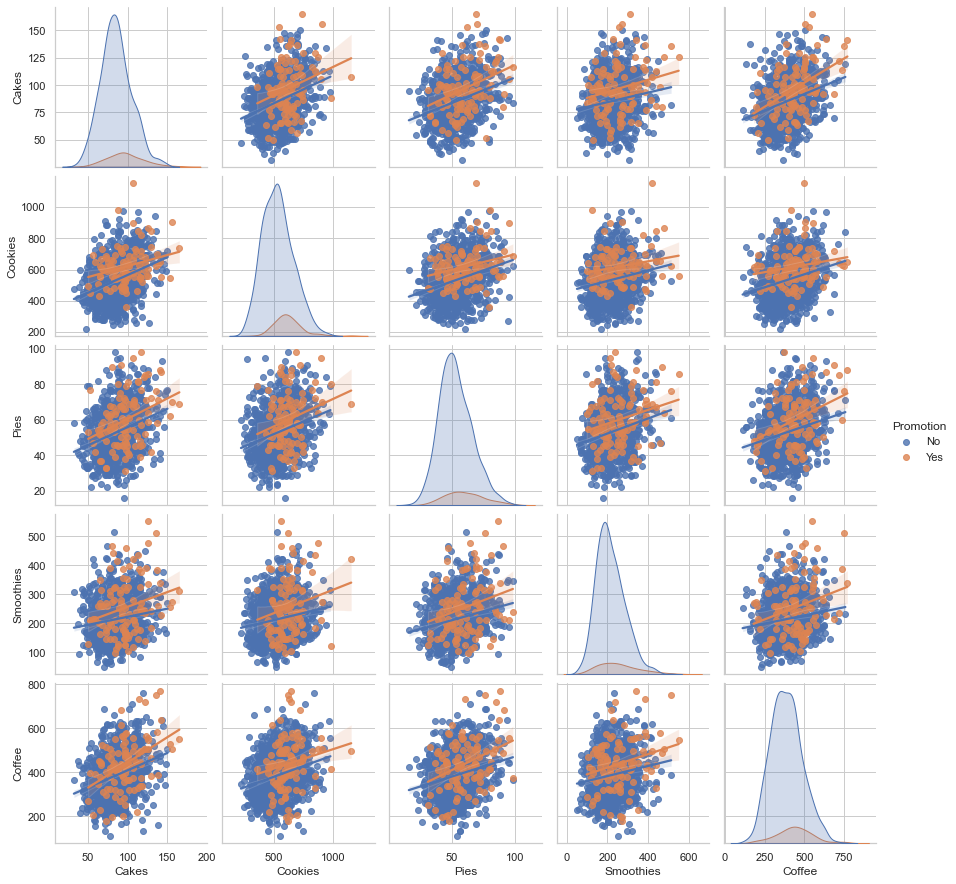

In [47]:
snacks_sales_items = snacks_sales.loc[:,['Cakes', 'Cookies', 'Pies', 'Smoothies','Coffee','Promotion']]
sns.pairplot(
    snacks_sales_items,
    hue='Promotion',
    kind='reg'
)
plt.show();

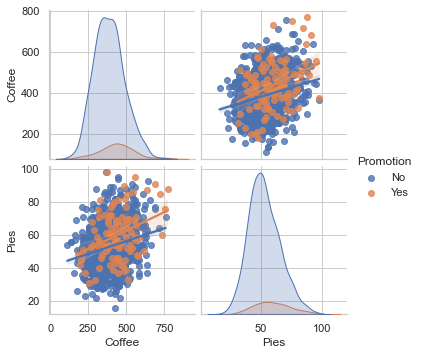

In [48]:
sns.pairplot(
    snacks_sales_items,
    vars=['Coffee', 'Pies'],
    hue='Promotion', kind='reg')
plt.show();

In [49]:
# snacks_sales_items[snacks_sales_items.Coffee > 0]

### PairGrid()

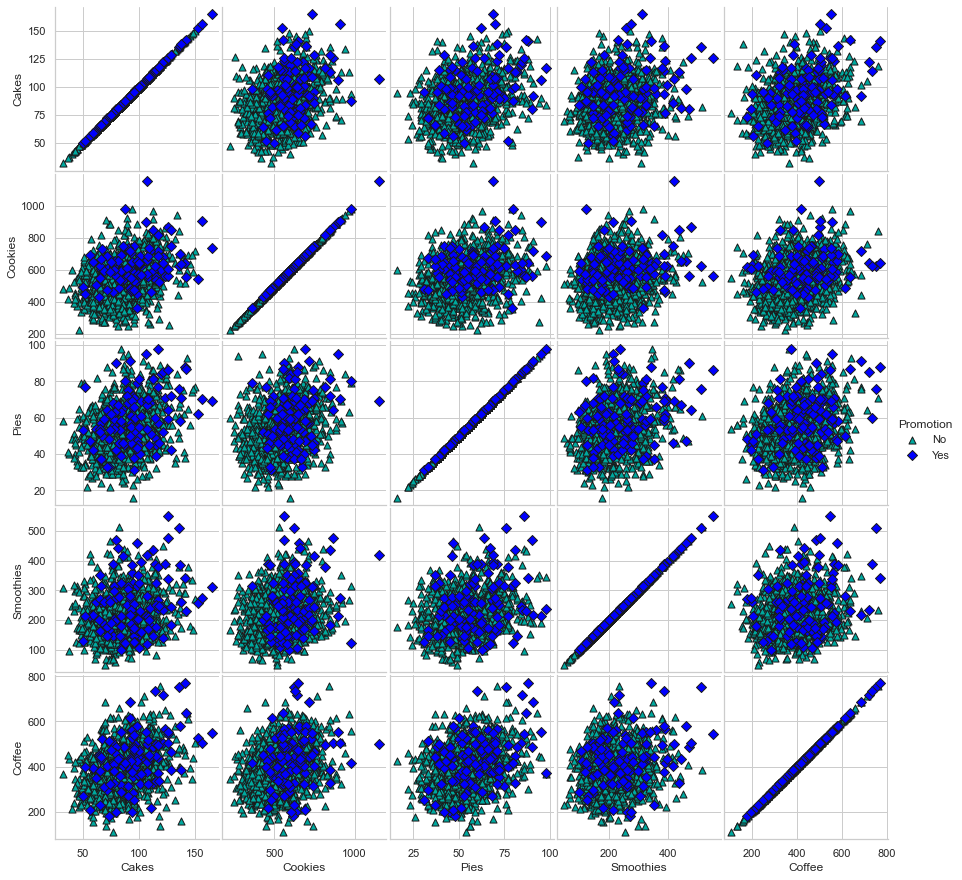

In [50]:
g = sns.PairGrid(
    snacks_sales_items, 
    hue='Promotion', 
    hue_kws={"marker": ["^", "D"]}, 
    palette={'Yes': 'blue', 'No': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

## Матричные диаграммы
- heatmap()
- clustermap()

### Heatmap

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
sales = pd.DataFrame(long_sales.groupby(["Item", "Quarter"]).Sales.mean())
sales = sales.reset_index()
sales = sales.pivot('Quarter','Item', 'Sales')
sales.head()

Item,Cakes,Coffee,Cookies,Pies,Smoothies
Quarter,,,,,
1,83.937037,395.814815,532.296296,52.996296,176.211111
2,86.890110,380.527473,527.117216,52.897436,243.300366
3,86.322464,394.492754,545.315217,53.344203,264.909420
4,87.927536,395.641304,556.753623,54.934783,188.797101


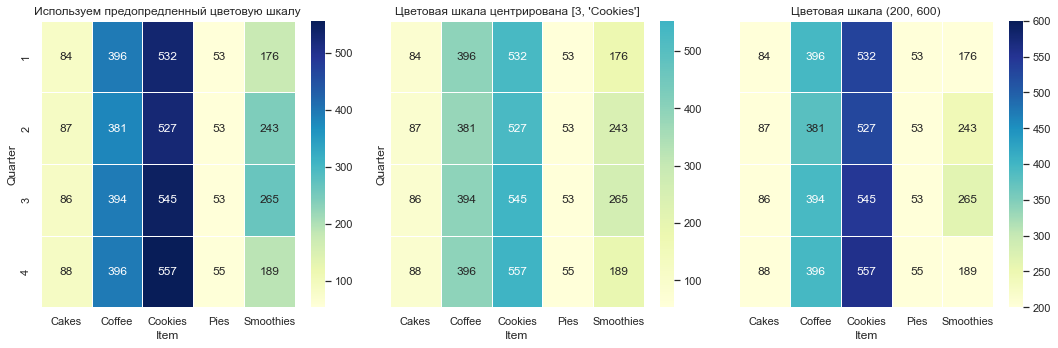

In [52]:
# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True,
    cmap="YlGnBu", 
    center=sales.loc[3, 'Cookies'], 
    yticklabels=False, 
    ax=ax2)

ax2.set_title("Цветовая шкала центрирована [3, 'Cookies']")

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True, 
    vmin=200, 
    vmax=600,
    cmap="YlGnBu", 
    yticklabels=False, 
    ax=ax3)
ax3.set(title='Цветовая шкала (200, 600)', ylabel='')

plt.tight_layout()
plt.show();

### Представляем другой датасет про винишко

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
file_path = os.path.join('data','winequality.csv')
wine_quality = pd.read_csv(file_path, delimiter=';')

quality_map = {3:'Low', 4: 'Low', 5:'Med', 6:'Med', 7:'High', 8:'High'}

wine_quality['Quality'] = wine_quality['quality'].map(quality_map)

corr = wine_quality.corr()
wine_quality.head()
set(wine_quality.quality)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Med
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Med


{3, 4, 5, 6, 7, 8}

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


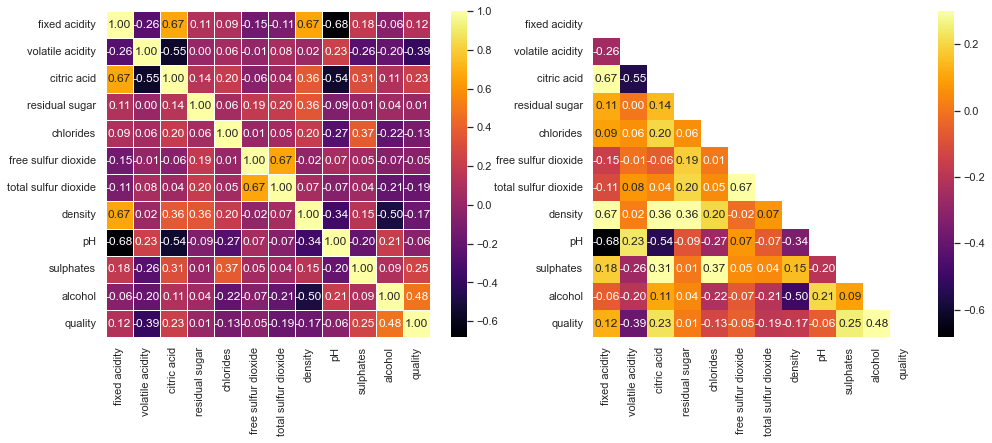

In [59]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6))
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();

### Clustermaps

In [60]:
row_colors = wine_quality["Quality"].map(dict(zip(wine_quality["Quality"].unique(), "rbg")))

In [61]:
# wine_quality

In [84]:
# wine_quality.drop('Quality',axis=1)

/Users/lev4/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


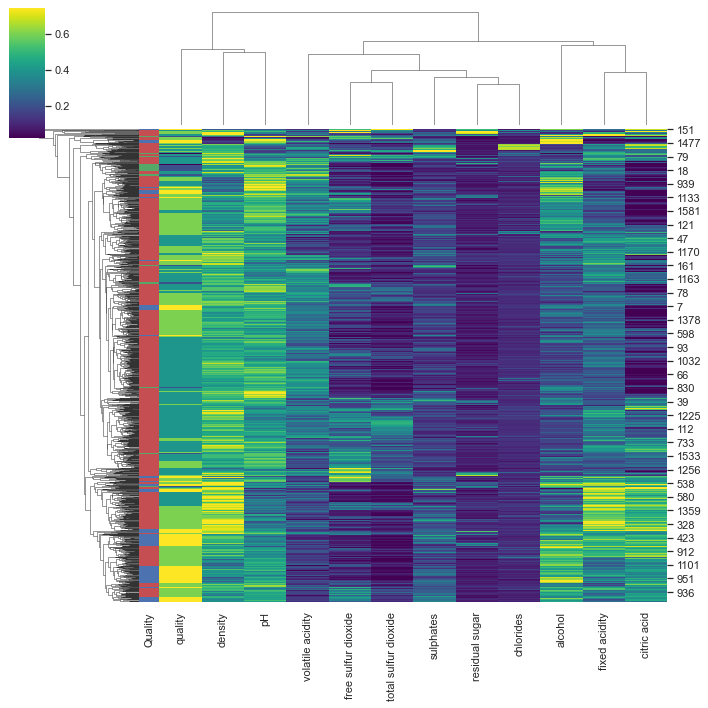

In [64]:
g = sns.clustermap(
    wine_quality.drop('Quality',axis=1), 
    standard_scale=1, 
    robust=True,
    row_colors=row_colors,
    cmap='viridis')

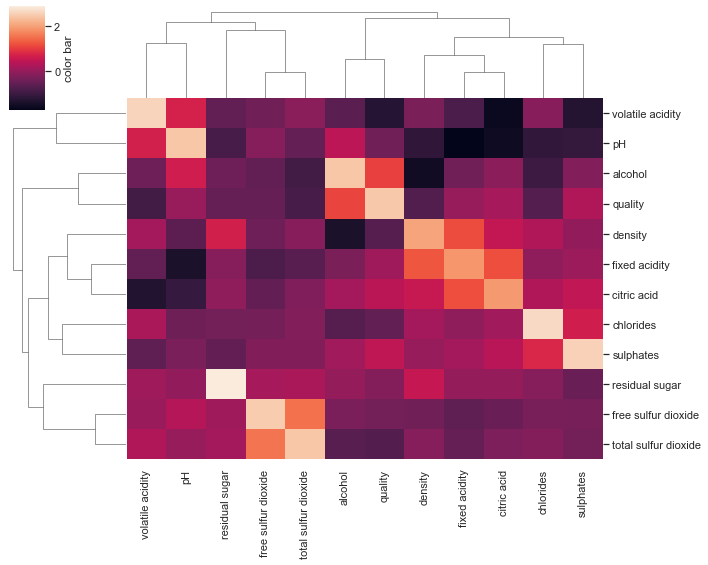

In [63]:
g = sns.clustermap(
    corr, 
    figsize=(10,8),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
)